In [4]:
URL = "https://www.indeed.com.sg/jobs?q=data&l=Singapore"

In [100]:
import urllib
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler #statsmodels api module
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [6]:
def parse(url):
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser', from_encoding="utf-8")
    df = pd.DataFrame(columns=["Title","Location","Company","Salary", "Synopsis"])
    for each in soup.find_all(class_= "result" ):
        try: 
            title = each.find(class_='jobtitle').text.replace('\n', '')
        except:
            title = 'None'
        try:
            location = each.find('span', {'class':"location" }).text.replace('\n', '')
        except:
            location = 'None'
        try: 
            company = each.find(class_='company').text.replace('\n', '')
        except:
            company = 'None'
        try:
            salary = each.find('span', {'class':'no-wrap'}).text
        except:
            salary = 'None'
        synopsis = each.find('span', {'class':'summary'}).text.replace('\n', '')
        df = df.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary, 'Synopsis':synopsis}, ignore_index=True)
    return df


In [7]:
parse(URL)

,Title,Location,Company,Salary,Synopsis
0,Data Scientist,None,Accenture,None,As well as be expo...
1,Data Scientist,None,Amgen,None,Experience process...
2,Analytics Consultant,None,Accenture,None,E.g.Big Data – Had...
3,Financial Services Industry - Capital Markets ...,None,Accenture,None,"FO, MO, Market Dat..."
4,Data Analyst,Singapore,None,None,Validating and correcting data fro...
5,Equity Analyst - Associate/Graduate Level,Singapore,AL Capital Holdings,"\n $60,000 a year",Strong aptitude for research and d...
6,Master Data Management Analyst,Singapore,Apple,None,Which may include adding data requ...
7,Marketing Analytics Analyst,Singapore,90 Seconds,None,Comfortable leveraging large amoun...
8,OMC Senior Data Center Technician,Singapore,Microsoft,None,We focus on smart growth with an e...
9,"Analyst, Visa Consulting & Analytics",Singapore,Visa,None,Work with large volumes of data; C...


# Load dataset

In [101]:
# Loading compiled dataset of the group 
df = pd.read_csv('/Users/adhish/Downloads/combined4.csv')

# Cleaning the data 

In [102]:
df.head(20)

,job_title,job_description,salary,company,salary_min
0,"VP, Business Data Analyst, Enterprise Data Str...","VP, Business Data Analyst, Enterprise Data St...",6000,United Overseas Bank,5000
1,Data Architect,An exciting Data Architect role has just bec...,15000,Robert Walters (Singapore) Pte Ltd,13333
2,Data Analyst,Leading the way in International Banking. We...,4500,Standard Chartered Bank Singapore,4500
3,Data Architect,Leading the way in International Banking. We...,4500,Standard Chartered Bank Singapore,4500
4,Data Manager,"This role reports to the project lead, Retai...",4500,Standard Chartered Bank Singapore,4500
5,"Head, Big Data Engineering (Chief Data Office)",Leading the way in International Banking. We ...,4500,Standard Chartered Bank Singapore,4500
6,Data Analyst,2-3 years of experience in SQL. Knowledge of...,6000,Helius Technologies Pte Ltd,5000
7,"Data Lead, FCC Screening, Chief Data Office",Leading the way in International Banking. We ...,4500,Standard Chartered Bank Singapore,4500
8,Senior Data Analyst,Senior Data Analyst Deep dive into our data...,6000,OCBC Bank,5000
9,"Data Analyst, Group Data Management Office (1 ...","Data Analyst, Group Data Management Office (1...",6000,OCBC Bank,5000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 5 columns):
job_title          1506 non-null object
job_description    1506 non-null object
salary             1506 non-null object
company            1506 non-null object
salary_min         1506 non-null object
dtypes: object(5)
memory usage: 58.9+ KB


In [104]:
print df.get_dtype_counts()
print '----------------------------------'
print df.dtypes
print '----------------------------------'
print df.isnull().sum()
print '----------------------------------'
print df.index
print '----------------------------------'
print df.shape

object    5
dtype: int64
----------------------------------
job_title          object
job_description    object
salary             object
company            object
salary_min         object
dtype: object
----------------------------------
job_title          0
job_description    0
salary             0
company            0
salary_min         0
dtype: int64
----------------------------------
RangeIndex(start=0, stop=1506, step=1)
----------------------------------
(1506, 5)


In [105]:
print df.columns

Index([u'job_title', u'job_description', u'salary', u'company', u'salary_min'], dtype='object')


In [106]:
# Printing column names and whats contained in them 
for col in df.columns :
    print 'Column Name:' ,col
    print df[col].value_counts()
    print '-----------------------------------------------'

Column Name: job_title
Business Analyst                                                                                          294
Data Analyst                                                                                              224
Data Scientist                                                                                            166
Business Intelligence                                                                                      40
Data Engineer                                                                                              27
Data Entry Officer / Public Surveyor - JP                                                                   9
Scientist (Data Analytics)  /  I2R (A*STAR)                                                                 8
Senior Data Engineer                                                                                        6
Data Analyst Intern                                                                              

In [107]:
# Remove remove_non_ascii characters
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)

df['job_title'] = df['job_title'].apply(remove_non_ascii)
df['job_description'] = df['job_description'].apply(remove_non_ascii)
df['company'] = df['company'].apply(remove_non_ascii)

In [108]:
# Combine all text and dump into one column and explore salary column
df['combined'] = df['job_description'] 
df['salary'].describe()

count              1506
unique              133
top       Not Specified
freq                359
Name: salary, dtype: object

In [112]:
# Looking at the salary column we see that there are 359 non specified values 
salary_sum = []
for i in df.salary.values:
   if i != 'Not Specified':
       salary_sum.append(float(i))

np.median(salary_sum)

4500.0

In [110]:
# Replace 'Non-Specified' salary with the median we have found 

df = df[ (df['salary'] == 'Not Specified') == False ]

In [113]:
# Change the salary column type to float
df['salary'] = df['salary'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1421
Data columns (total 6 columns):
job_title          1147 non-null object
job_description    1147 non-null object
salary             1147 non-null float64
company            1147 non-null object
salary_min         1147 non-null object
combined           1147 non-null object
dtypes: float64(1), object(5)
memory usage: 62.7+ KB


In [15]:
# Split salary into two dfs, df_topredict and df_train 
df_topredict = df.loc[df['salary'] == 0]
df_train = df.loc[df['salary'] != 0]

In [114]:
X = df_train['combined']
y = df_train['salary']
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

type(X_train)


(1129,)
(377,)
(1129,)
(377,)


pandas.core.series.Series

# Question 1


In [115]:
# Importing NLP toolkits 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk
import numpy as np

In [116]:
# NLTK and sklearn both have their own stop words list 
nltk.download('stopwords')
nltk_stops = stopwords.words()
custom_stop_words = list(ENGLISH_STOP_WORDS)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adhish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices
Xs_train = vect.fit_transform(X_train)
Xs_test = vect.transform(X_test)
# Check the length of our data that is in a vectorized state
print('# of features: {}'.format( len(vect.get_feature_names()) ))
print 'Xs_train.shape', Xs_train.shape
print 'Xs_test.shape', Xs_test.shape

# of features: 13727
Xs_train.shape (1129, 13727)
Xs_test.shape (377, 13727)


In [118]:
# Looking into Xs_train
Xs_train

<1129x13727 sparse matrix of type '<type 'numpy.int64'>'
	with 201890 stored elements in Compressed Sparse Row format>

In [119]:
# to see what's inside, re-do this and put into a df.
# Transforming our x_train data using fit cvec.
# converting the result to a DataFrame.
Xs_train = pd.DataFrame(vect.transform(df['combined']).todense(),
                       columns=vect.get_feature_names())

Xs_train.head()

,00,000,0000974,000interested,000location,000work,000z,00am,00pm,00pmrequirements,...,zi,zkclient,zone,zones,zookeeper,zoomdata,zoomdatacomfortable,zrich,zurich,zycus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# Which words appear the most?
word_counts = Xs_train.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

and           20888
to            10913
the            8630
in             7980
of             7861
data           6850
with           5511
for            3866
business       3365
experience     3146
or             2936
on             2292
as             2236
is             1922
will           1840
be             1832
you            1734
management     1634
team           1578
work           1547
dtype: int64

# NLP Stop word removal 

In [121]:
# Appending to the list of stop words to be removed 
from sklearn.feature_extraction import text 
new_words = ['work','new', 'ensure', 'team', 'provide', 'including' , 'experience', 'skills', 'data', 'knowledge',
            'ability', 'strong', 'years', 'management', 'business', 'working', 'good', 'degree', 'communication',
            'excellent', 'able', 'science', 'computer', 'time', 'development', 'environment', 'related', 'engineering',
            'understanding', 'technical', 'analytical', 'relevant', 'requirements', 'minimum', 'tools', 'systems',
            'analytics', 'information', 'preferred', 'learning', 'design', 'software', 'written', 'technology'              
            'project', 'plus', 'candidates', 'using', 'required', 'research', 'com', 'industry', 'interpersonal',
            'python', 'solutions', 'excel', 'problems', 'advantage', 'apply', 'solving' 'statistics','programming'             
            'level', 'high', 'player']
custom_stop_words.extend(new_words)
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)
type(stop_words)

frozenset

In [25]:
# remove English stop words
vect = CountVectorizer(stop_words=stop_words, ngram_range=(1,2),lowercase=True)
Xs_train = vect.fit_transform(X_train)
Xs_test = vect.transform(X_test)

Xs_train = pd.DataFrame(vect.transform(df['combined']).todense(),
                       columns=vect.get_feature_names())

word_counts = Xs_train.sum(axis=0)
word_counts.sort_values(ascending = False).head

<bound method Series.head of support                           1563
analysis                          1532
develop                           1056
machine                            989
job                                850
process                            847
projects                           844
models                             816
teams                              796
responsibilities                   771
financial                          757
role                               754
sql                                733
quality                            710
performance                        698
big                                678
processes                          676
stakeholders                       673
insights                           652
statistical                        647
based                              621
identify                           611
customer                           610
services                           609
reporting                          

In [122]:
print Xs_train.shape
print Xs_test.shape
print y_train.shape
print y_test.shape

(1147, 13727)
(377, 13727)
(1129,)
(377,)


In [123]:
type(X_train)
# X_train

pandas.core.series.Series

In [124]:
# Feature extraction with CountVectorizer and then running linear regression 
vect = CountVectorizer(stop_words=stop_words, ngram_range=(1, 2),lowercase=True)
Xs_train = vect.fit_transform(X_train)
Xs_test = vect.transform(X_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xs_train, y_train)
lr.score(Xs_test, y_test)
# The score is terrible! 

-0.04941733818356697

In [126]:
# Feature extraction with TfidfVectorizer- Word Importance 
tfidfvect = TfidfVectorizer(stop_words=stop_words, ngram_range = (1,2))
Xs_train = tfidfvect.fit_transform(X_train)
Xs_test = tfidfvect.transform(X_test)

Xs_train = pd.DataFrame(tfidfvect.transform(df['combined']).todense(),
                       columns=tfidfvect.get_feature_names())

word_counts = Xs_train.sum(axis=0)
word_counts.sort_values(ascending = False)

project                     19.296164
analysis                    18.973866
support                     18.443586
machine                     15.254074
technology                  14.520498
financial                   13.701109
process                     13.326259
develop                     12.981835
projects                    12.376144
user                        12.226461
job                         12.217894
application                 11.836656
analyst                     11.730257
big                         11.231827
reporting                   11.046847
performance                 11.001343
quality                     10.912115
stakeholders                10.861284
implementation              10.746461
role                        10.628028
end                         10.601027
processes                   10.591870
sql                         10.514899
models                      10.487600
teams                       10.254803
statistical                 10.205691
candidate   

In [127]:
# Running linear regression
Xs_train = tfidfvect.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xs_train, y_train)
lr.score(Xs_test, y_test)
# Not a great score 

0.14417147218538362

In [128]:
# Feature extraction using Hashing Vectorizer 
hashvec = HashingVectorizer(stop_words=stop_words, non_negative=True, ngram_range = (1,2))
Xs_train = hashvec.fit_transform(X_train)
Xs_test = hashvec.transform(X_test)

# Running regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xs_train, y_train)
lr.score(Xs_test, y_test)
# TFIDF score is the best 

/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


0.06649648698357513

In [129]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

lr = LinearRegression()
lr_lasso = Lasso(random_state=0, alpha=500) # alpha 0 to 1
lr_ridge = Ridge(alpha=100)   # alpha 0 to 1
elast = ElasticNet(alpha=0.1, l1_ratio=0.1)   # alpha 0 to 1
svr = SVR(kernel='linear')  # almost the same as poly
dtr = DecisionTreeRegressor(random_state=0)
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0) # number of trees 10. Pick random.
gradboost_reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1) # default n_estimators=100, learning_rate=0.1

lr.fit(Xs_train, y_train)
lr_lasso.fit(Xs_train, y_train)
lr_ridge.fit(Xs_train, y_train)
elast.fit(Xs_train, y_train)
svr.fit(Xs_train, y_train)
dtr.fit(Xs_train, y_train)
rfr.fit(Xs_train, y_train)
gradboost_reg.fit(Xs_train, y_train)


print 'Accuracy score :'
print 'LinearRegression          : ', lr.score(Xs_test, y_test)
print 'Lasso                     : ', lr_lasso.score(Xs_test, y_test)
print 'Ridge                     : ', lr_ridge.score(Xs_test, y_test)
print 'ElasticNet                : ', elast.score(Xs_test, y_test)
print 'SVR                       : ', svr.score(Xs_test, y_test)
print 'DecisionTreeRegressor     : ', dtr.score(Xs_test, y_test)
print 'RandomForestRegressor     : ', rfr.score(Xs_test, y_test)
print "GradientBoostingRegressor : ", gradboost_reg.score(Xs_test, y_test)
print '=====================================================================:'
print 'Cross_val_score :'
print 'LinearRegression          : ', cross_val_score(lr, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'Lasso                     : ', cross_val_score(lr_lasso, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'Ridge                     : ', cross_val_score(lr_ridge, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'ElasticNet                : ', cross_val_score(elast, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'SVR                       : ', cross_val_score(svr, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'DecisionTreeRegressor     : ', cross_val_score(dtr, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print 'RandomForestRegressor     : ', cross_val_score(rfr, Xs_train, y_train, cv=3, n_jobs=-1).mean()
print "GradientBoostingRegressor : ", cross_val_score(gradboost_reg, Xs_train, y_train, cv=3, n_jobs=-1).mean()

Accuracy score :
LinearRegression          :  0.06649648698357513
Lasso                     :  -0.00018597343032178415
Ridge                     :  0.03054485633468096
ElasticNet                :  0.029887104148475063
SVR                       :  -0.05303509705821207
DecisionTreeRegressor     :  -0.12038199186938826
RandomForestRegressor     :  0.24770181770178987
GradientBoostingRegressor :  0.22463385217099363
=====================================================================:
Cross_val_score :
LinearRegression          :  0.14833843416761794
Lasso                     :  -0.0075060995476685655
Ridge                     :  0.014163076137660288
ElasticNet                :  0.023083353269106415
SVR                       :  -0.05212306037662007
DecisionTreeRegressor     :  -0.12803913452668433
RandomForestRegressor     :  0.3228795793563365
GradientBoostingRegressor :  0.23825265441126853


In [130]:
#Ensemble method ==> Bagging , AdaBoost, GradientBoost
# Bagging regressor.
lr = LinearRegression()
from sklearn.ensemble import BaggingRegressor
lr_bagger = BaggingRegressor(lr)
print "lr Bagging Score            : ", cross_val_score(lr_bagger, Xs_train, y_train, cv=10, n_jobs=-1).mean()

lr Bagging Score            :  0.26272603166363245


In [41]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
lr_adaboost = AdaBoostRegressor(base_estimator=lr, learning_rate=0.1 )
print "lr_adaboost Score       : ", cross_val_score(lr_adaboost, Xs_train, y_train, cv=10, n_jobs=-1).mean()

 lr_adaboost Score       : 

NameError: name 'Xls_train' is not defined

In [42]:
lr_adaboost.fit(Xs_train, y_train)
y_pred_lr_adaboost = lr_adaboost.predict(Xs_test)

NameError: name 'Xls_train' is not defined

In [43]:
df_plot = pd.DataFrame({'y_pred': y_pred_lr_adaboost, 'y_true': y_test})
#df.head()
sns.lmplot("y_pred", "y_true", data=df_plot)

NameError: name 'y_pred_lr_adaboost' is not defined

# Classification

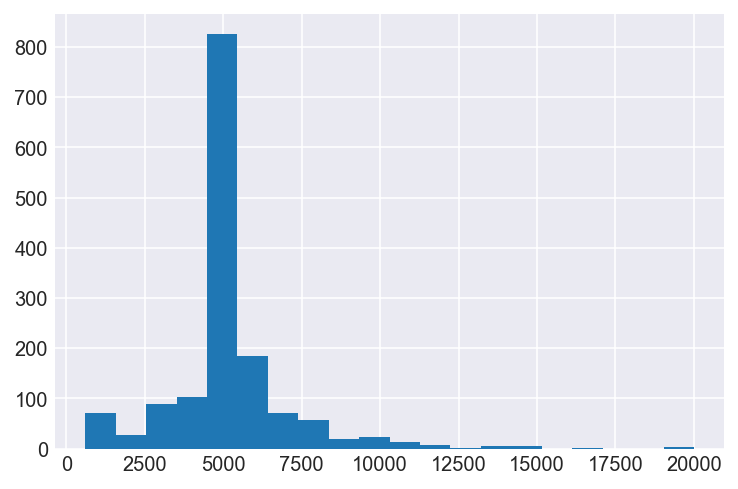

In [44]:
# Plotting salary
df['salary'].hist(bins=20)

In [45]:
# Seeing the distribution
df_train['salary'].describe()

count     1506.000000
mean      4972.182603
std       2059.323446
min        600.000000
25%       4500.000000
50%       4500.000000
75%       5500.000000
max      20000.000000
Name: salary, dtype: float64

In [46]:
# Spliting salaries into two 
df_topredict = df.loc[df['salary'] == 0]
df_train = df.loc[df['salary'] != 0]

In [47]:
(df_train['salary'] >= 2000) & (df_train['salary'] < 5000)

0       False
1       False
2        True
3        True
4        True
5        True
6       False
7        True
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22       True
23       True
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1476     True
1477     True
1478     True
1479     True
1480     True
1481     True
1482     True
1483     True
1484     True
1485     True
1486     True
1487     True
1488     True
1489     True
1490     True
1491     True
1492     True
1493     True
1494     True
1495     True
1496     True
1497     True
1498     True
1499     True
1500     True
1501     True
1502     True
1503     True
1504     True
1505     True
Name: salary, Length: 1506, dtype: bool

In [84]:
# Binning the salary into classes and make sure it is balanced. (But they're not!)
df_train.loc[(df_train['salary'] >= 0) & (df_train['salary'] < 4500) , 'Pay_class'] = 1
df_train.loc[(df_train['salary'] >= 4500) & (df_train['salary'] < 4501) , 'Pay_class'] = 2
df_train.loc[(df_train['salary'] >= 4501) & (df_train['salary'] < 5500) , 'Pay_class'] = 3
df_train.loc[(df_train['salary'] >= 5500) , 'Pay_class'] = 4
df_train['Pay_class']= df_train['Pay_class'].fillna(0.0).astype(int)  # Turn y into int
df_train['Pay_class'].value_counts()

2    704
4    392
1    289
3    121
Name: Pay_class, dtype: int64

In [85]:
# Getting a pay_prediction median
df_train.loc[df_train['Pay_class'] == 1, 'Pay_pred_median'] =  (0.0 + 4500)/2
df_train.loc[df_train['Pay_class'] == 2, 'Pay_pred_median'] = (4500 + 4501)/2
df_train.loc[df_train['Pay_class'] == 3, 'Pay_pred_median'] = (4501 + 5500)/2
df_train.loc[df_train['Pay_class'] == 4, 'Pay_pred_median'] = (5500 + 20000)/2
df_train

,job_title,job_description,salary,company,salary_min,combined,Pay_class,Pay_pred_median
0,"VP, Business Data Analyst, Enterprise Data Str...","VP, Business Data Analyst, Enterprise Data St...",6000.0,United Overseas Bank,5000,"VP, Business Data Analyst, Enterprise Data St...",4,12750.0
1,Data Architect,An exciting Data Architect role has just bec...,15000.0,Robert Walters (Singapore) Pte Ltd,13333,An exciting Data Architect role has just bec...,4,12750.0
2,Data Analyst,Leading the way in International Banking. We...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We...,2,4500.0
3,Data Architect,Leading the way in International Banking. We...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We...,2,4500.0
4,Data Manager,"This role reports to the project lead, Retai...",4500.0,Standard Chartered Bank Singapore,4500,"This role reports to the project lead, Retai...",2,4500.0
5,"Head, Big Data Engineering (Chief Data Office)",Leading the way in International Banking. We ...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We ...,2,4500.0
6,Data Analyst,2-3 years of experience in SQL. Knowledge of...,6000.0,Helius Technologies Pte Ltd,5000,2-3 years of experience in SQL. Knowledge of...,4,12750.0
7,"Data Lead, FCC Screening, Chief Data Office",Leading the way in International Banking. We ...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We ...,2,4500.0
8,Senior Data Analyst,Senior Data Analyst Deep dive into our data...,6000.0,OCBC Bank,5000,Senior Data Analyst Deep dive into our data...,4,12750.0
9,"Data Analyst, Group Data Management Office (1 ...","Data Analyst, Group Data Management Office (1...",6000.0,OCBC Bank,5000,"Data Analyst, Group Data Management Office (1...",4,12750.0


In [86]:
X_cat = df_train['combined']
y_cat = df_train['Pay_class']

# split the new DataFrame into training and testing sets
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cat, y_cat, test_size=0.25, random_state=1)

print Xc_train.shape
print Xc_test.shape
print yc_train.shape
print yc_test.shape

(1129,)
(377,)
(1129,)
(377,)


In [87]:
#CountVectorizer with Log_regression
cvec_sn12 = CountVectorizer(stop_words=stop_words, ngram_range=(1, 2),lowercase=True)
X_cvec_sn12_train = cvec_sn12.fit_transform(Xc_train)
X_cvec_sn12_test = cvec_sn12.transform(Xc_test)

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state = 0)
logr.fit(X_cvec_sn12_train, yc_train)
print 'logr.score with X_cvec_sn12' , logr.score(X_cvec_sn12_test, yc_test)

yc_pred = logr.predict(X_cvec_sn12_test)

from sklearn.metrics import classification_report
print(classification_report(yc_test, yc_pred))

logr.score with X_cvec_sn12 0.5755968169761273
             precision    recall  f1-score   support

          1       0.57      0.63      0.60        68
          2       0.61      0.63      0.62       179
          3       0.42      0.24      0.30        34
          4       0.55      0.56      0.56        96

avg / total       0.57      0.58      0.57       377



In [53]:
#CountVectorizer with decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=None)
dtc.fit(X_cvec_sn12_train, yc_train)
print 'dtc.score with X_cvec_sn12' , dtc.score(X_cvec_sn12_test, yc_test)

ydtc_pred = dtc.predict(X_cvec_sn12_test)

from sklearn.metrics import classification_report
print(classification_report(yc_test, ydtc_pred))

dtc.score with X_cvec_sn12 0.6816976127320955
             precision    recall  f1-score   support

          1       0.73      0.58      0.65        19
          2       0.75      0.81      0.78       237
          3       0.42      0.38      0.40        34
          4       0.54      0.47      0.50        87

avg / total       0.67      0.68      0.68       377



In [88]:
#CountVectorizer with naive_bayes MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_cvec_sn12_train, yc_train)
print 'MultinomialNB .score with X_cvec_sn12: ' , nb.score(X_cvec_sn12_test, yc_test)

ynb_pred = nb.predict(X_cvec_sn12_test)


from sklearn.metrics import classification_report
print(classification_report(yc_test, ynb_pred))

MultinomialNB .score with X_cvec_sn12:  0.5809018567639257
             precision    recall  f1-score   support

          1       0.67      0.46      0.54        68
          2       0.56      0.72      0.63       179
          3       0.47      0.21      0.29        34
          4       0.60      0.55      0.57        96

avg / total       0.58      0.58      0.57       377



In [89]:
# TfidfVectorizer with LogisticRegression with Stop word and n-gram1,2.
tfidfvect = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 2))
X_tfidfvect_train = tfidfvect.fit_transform(Xc_train)
X_tfidfvect_test = tfidfvect.transform(Xc_test)

from sklearn.linear_model import LogisticRegression
logr2 = LogisticRegression(random_state = 0)
logr2.fit(X_tfidfvect_train, yc_train)
print 'logr2.score with tfidfvect sn12: ' , logr2.score(X_tfidfvect_test, yc_test)

ylogr2_pred = logr2.predict(X_tfidfvect_test)


from sklearn.metrics import classification_report
print(classification_report(yc_test, ylogr2_pred))


logr2.score with tfidfvect sn12:  0.5994694960212201
             precision    recall  f1-score   support

          1       1.00      0.32      0.49        68
          2       0.55      0.93      0.69       179
          3       0.00      0.00      0.00        34
          4       0.69      0.40      0.50        96

avg / total       0.62      0.60      0.55       377



In [56]:
#HashingVectorizer
hashvec = HashingVectorizer(stop_words=stop_words, non_negative=True, ngram_range=(1, 2))
Xhvec_train = hashvec.fit_transform(Xc_train)
Xhvec_test = hashvec.transform(Xc_test)

from sklearn.linear_model import LogisticRegression
logr3 = LogisticRegression(random_state = 0)
logr3.fit(Xhvec_train, yc_train)

print 'logr3.score with hashvec with stop' , logr3.score(Xhvec_test, yc_test)

ylogr3_pred = logr3.predict(Xhvec_test)


from sklearn.metrics import classification_report
print(classification_report(yc_test, ylogr3_pred))

/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


logr3.score with hashvec with stop 0.6631299734748011
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        19
          2       0.66      0.97      0.79       237
          3       1.00      0.09      0.16        34
          4       0.64      0.21      0.31        87

avg / total       0.65      0.66      0.58       377



In [90]:
#TfidfVectorizer with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier  
gbc = GradientBoostingClassifier(n_estimators=10)
gbc.fit(X_tfidfvect_train, yc_train)

print 'gbc.score with tfidfvect' , gbc.score(X_tfidfvect_test, yc_test)

ygbc_pred = gbc.predict(X_tfidfvect_test)

from sklearn.metrics import classification_report
print(classification_report(yc_test, ygbc_pred))

gbc.score with tfidfvect 0.5755968169761273
             precision    recall  f1-score   support

          1       0.60      0.18      0.27        68
          2       0.58      0.84      0.69       179
          3       0.29      0.12      0.17        34
          4       0.60      0.52      0.56        96

avg / total       0.56      0.58      0.53       377



In [91]:
df_topredict.head()

,job_title,job_description,salary,company,salary_min,combined


In [61]:
X_pred = df_topredict['combined']
X_pred_vec = tfidfvect.transform(X_pred)    # CountVectorizer+stop_words ngram_range=(1, 2),lowercase=True)
df_topredict['Pay_class'] = logr2.predict(X_pred_vec)
df_topredict

ValueError: Found array with 0 sample(s) (shape=(0, 107465)) while a minimum of 1 is required by the normalize function.

In [63]:
X_pred = df_topredict['combined']
X_pred_vec = tfidfvect.transform(X_pred)    # CountVectorizer+stop_words ngram_range=(1, 2),lowercase=True)
df_topredict['Pay_class'] = logr2.predict(X_pred_vec)
df_topredict

ValueError: Found array with 0 sample(s) (shape=(0, 107465)) while a minimum of 1 is required by the normalize function.

In [131]:
df_topredict.loc[df_topredict['Pay_class'] == 1, 'Annual_medium'] =  (0.0 + 4500)/2
df_topredict.loc[df_topredict['Pay_class'] == 2, 'Annual_medium'] = (4500.0 + 4501.0)/2
df_topredict.loc[df_topredict['Pay_class'] == 3, 'Annual_medium'] = (4501.0 + 5500.0)/2
df_topredict.loc[df_topredict['Pay_class'] == 4, 'Annual_medium'] = (5500.0 + 20000.0)/2
df_topredict

KeyError: 'Pay_class'

In [64]:
pd.DataFrame( logr2.coef_, columns=tfidfvect.get_feature_names())

,00,00 00,00 000,00 000z,00 18,00 19,00 200,00 300,00 500,00 650,...,zoomdata comfortable,zoomdatacomfortable,zoomdatacomfortable large,zrich,zrich singapore,zurich,zurich singapores,zurich swiss,zycus,zycus proper
0,-0.089096,-0.004445,-0.014999,-0.001481,-0.003010,-0.003395,-0.004606,-0.003225,-0.003933,-0.004234,...,-0.002957,-0.003188,-0.003188,-0.002357,-0.002357,-0.004622,-0.002311,-0.002311,-0.006850,-0.006850
1,0.080867,0.021999,-0.014782,0.008090,0.018718,-0.034608,0.022721,0.015195,0.021891,0.023082,...,0.020401,0.022557,0.022557,-0.021461,-0.021461,-0.046114,-0.023057,-0.023057,0.029584,0.029584
2,0.152424,-0.006096,0.052894,-0.002093,-0.005014,-0.004956,-0.006789,-0.004359,-0.005349,-0.006056,...,-0.004784,-0.005031,-0.005031,-0.003256,-0.003256,-0.006225,-0.003112,-0.003112,-0.009489,-0.009489
3,-0.144758,-0.013748,-0.018323,-0.005423,-0.011642,0.043844,-0.014365,-0.009130,-0.013545,-0.014098,...,-0.014158,-0.015466,-0.015466,0.026890,0.026890,0.058288,0.029144,0.029144,-0.019515,-0.019515


In [65]:
# logr.coef_
docs = pd.DataFrame( abs(logr2.coef_),
                    columns=tfidfvect.get_feature_names()).sum()
    
docs.sort_values(ascending=False).head(30)

amp              3.455243
roles            2.640721
intern           2.635821
risk             2.020620
like             1.750050
hadoop           1.729726
big              1.657633
engineer         1.612147
technologies     1.547695
job              1.523535
code             1.506370
sales            1.502058
global           1.478915
distributed      1.406573
investment       1.380496
image            1.350269
deep             1.339320
marketing        1.332509
cloud            1.329163
quality          1.328620
want             1.328184
phd              1.325883
agile            1.290872
visualization    1.270411
build            1.261876
regional         1.255185
office           1.251494
banking          1.250108
scientist        1.248400
pipelines        1.245290
dtype: float64

# Question 2 

In [67]:
# Creating target variable y. All 'data' jobs are 1, rest are 0.
df[df.job_title.str.contains(pat='Data')]

,job_title,job_description,salary,company,salary_min,combined
0,"VP, Business Data Analyst, Enterprise Data Str...","VP, Business Data Analyst, Enterprise Data St...",6000.0,United Overseas Bank,5000,"VP, Business Data Analyst, Enterprise Data St..."
1,Data Architect,An exciting Data Architect role has just bec...,15000.0,Robert Walters (Singapore) Pte Ltd,13333,An exciting Data Architect role has just bec...
2,Data Analyst,Leading the way in International Banking. We...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We...
3,Data Architect,Leading the way in International Banking. We...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We...
4,Data Manager,"This role reports to the project lead, Retai...",4500.0,Standard Chartered Bank Singapore,4500,"This role reports to the project lead, Retai..."
5,"Head, Big Data Engineering (Chief Data Office)",Leading the way in International Banking. We ...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We ...
6,Data Analyst,2-3 years of experience in SQL. Knowledge of...,6000.0,Helius Technologies Pte Ltd,5000,2-3 years of experience in SQL. Knowledge of...
7,"Data Lead, FCC Screening, Chief Data Office",Leading the way in International Banking. We ...,4500.0,Standard Chartered Bank Singapore,4500,Leading the way in International Banking. We ...
8,Senior Data Analyst,Senior Data Analyst Deep dive into our data...,6000.0,OCBC Bank,5000,Senior Data Analyst Deep dive into our data...
9,"Data Analyst, Group Data Management Office (1 ...","Data Analyst, Group Data Management Office (1...",6000.0,OCBC Bank,5000,"Data Analyst, Group Data Management Office (1..."


In [132]:
# as integer
df['DS'] = df.job_title.str.contains(pat='Data').astype(int)

In [133]:
# check shape
df[df.job_title.str.contains(pat='Data')].shape

(629, 7)

In [134]:
# Getting our x and y
X_ds = df['combined']
y_ds = df['DS']

print y_ds.shape
print X_ds.shape

(1147,)
(1147,)


In [135]:
#CountVectorizer with Log_regression
vectds = CountVectorizer(stop_words=stop_words, ngram_range=(1, 2),lowercase=True)
X_ds_vec = vectds.fit_transform(X_ds)
# Xds_test_vec = vectds.transform(Xds_test)

In [136]:
Xds_train, Xds_test, yds_train, yds_test = train_test_split(X_ds_vec, y_ds, test_size=0.25, random_state=1)

In [138]:
# Running logistic regression 
from sklearn.linear_model import LogisticRegression
logr4 = LogisticRegression(random_state = 0)
logr4.fit(X_ds_vec, y_ds)
logr4.score(Xds_test, yds_test)
y_pred = logr4.predict(Xds_test)

In [139]:
# Printing classification report
from sklearn.metrics import classification_report
print(classification_report(yds_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       137
          1       1.00      1.00      1.00       150

avg / total       1.00      1.00      1.00       287



In [76]:
# Applying all classifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier  
from xgboost import XGBClassifier

logr = LogisticRegression(random_state = 0, n_jobs=1)
logr_lasso = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=100, cv=10, n_jobs=1)
logr_ridge = LogisticRegressionCV(penalty='l2', Cs=200, cv=5, n_jobs=1) #l2 is ridge, Cs: How many different (automatically-selected) regularization strengths should be tested.
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2, n_jobs=1) # KNN = Neaest Neighbors classifier # choosing Euclidean , the other type is called Manhattan
dtc = DecisionTreeClassifier(max_depth=None)
gbc = GradientBoostingClassifier(n_estimators=10) # warm_start=True meaning retain old training data when fit, but careful might overfit
xgbc = XGBClassifier(n_jobs=1)  #Takes many model,

logr.fit(X_rus, y_rus)
logr_lasso.fit(X_rus, y_rus)
logr_ridge.fit(X_rus, y_rus)
knn.fit(X_rus, y_rus)
dtc.fit(X_rus, y_rus)
gbc.fit(X_rus, y_rus)
xgbc.fit(X_rus, y_rus)

print 'Classification Report (precision/recall/f1-score/support)'
print 'LogisticRegression             : ' , classification_report(yds_test, logr.predict(Xds_test))
print 'LogisticRegressionCV L1 Lasso  : ' , classification_report(yds_test, logr_lasso.predict(Xds_test))
print 'LogisticRegressionCV L2 Ridge  : ' , classification_report(yds_test, logr_ridge.predict(Xds_test))
print 'KNeighborsClassifier           : ' , classification_report(yds_test, knn.predict(Xds_test))
print 'DecisionTreeClassifier         : ' , classification_report(yds_test, dtc.predict(Xds_test))
print 'GradientBoostClassifier        : ' , classification_report(yds_test, gbc.predict(Xds_test))
print 'XGBClassifier                  : ' , classification_report(yds_test, xgbc.predict(Xds_test))

ImportError: No module named xgboost

In [77]:
pd.DataFrame( abs(logr.coef_),
                    columns=vectds.get_feature_names()).sum()
    
docs.sort_values(ascending=False)

ValueError: Shape of passed values is (107465, 4), indices imply (129752, 4)

# Executive Summary 

The utimate goal is to predict the annual salary based on the available features. In order to get the target y, I had to prepare for it first, as the scrapped salaries are joined together in a single string on a monthly basis. 

I had to split the dataset to 2 on the basis of...(changes to be incorporated)

Once the target is properly defined, we will focus on train set feature X. Since it is a prediction of numbers, my first attempt is to use regression. However,the X features are all in text. So it is time to use the new skill learn from the course, yes, NLP.

The first thing we learn is to tokenize the text. What it means is to separate the text into untis such as sentences or words. Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm. We call this process feature extraction, also known as vectorization. This is when NLTL package comes in. NLTK feature extraction module comes with 3 very common vectorizer.

1) CountVectorizer: to convert text to word count vectors . 2) TfidfVectorizer : to convert text to word frequency vectors. 3) HashingVectorizer : to convert text to unique integers.

Each have it's own stop word ability. Stop word is a list of words which its meaning has no effect to the meaning of the context. These words are stored in a list, and the vectorizer is smart enough to remove them.

Next feature that the vectorizer have is ngram. I put 1 to 2 settings. This is telling the vectorizer to put maximum 2 words together then do the counting on it as a whole. Of course I could have put 3 or 4, not only that the score drops, the 3 words combined don't make any sense. For example ngram=4, "research capabilities shared sensor".

Now with stop words, ngram applied to all 3 vectorizor, the regresion score appears to be terrible. 

I did run back and forth changing the param and adding new stop words, but without any improvement. I have even tried to apply ALL the regression I know, example lasso, ridge, decisiontree, support vector, random forest, gridient boost, bagging with all regressor in, as well as adaboost. None of them gives any good score.

That is when I realized, it could be due to regression's assumption. For regression to work, the relationship between independent and depentent varible must be linear. I did not check this and jump into regression is a grave mistake. But a good one.

So I tried classification technique. Same thing, we need to prepare y target. I binned the salary into 4 bins, according to the distribution, so that all class is balanced.

After y target is defined, and apply it to countvectorizer cum lemmatized words, stop word, ngram 1,2, into logistic regression, decisiontress, and multinomial navie bayes. The score highest achieved is only 0.48 from tfid logistic regression.



As for Question 2, we are supposed to find the Factors that distinguish job category. However, I hit into a serious problem, yes, y_target becomes extremely unbalanced.